In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import math

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px


# Para el modelado de los datos
# -----------------------------------------------------------------------
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Preprocesado y modelado
# -----------------------------------------------------------------------


# Para la codificación de las variables numéricas
# -----------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder, RobustScaler# para poder aplicar los métodos de OneHot, Ordinal,  Label y Target Encoder 
from category_encoders import TargetEncoder
# Sacar número de clusters y métricas
# -----------------------------------------------------------------------
# pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

# Modelos de clustering
# -----------------------------------------------------------------------
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering

# Para visualizar los dendrogramas
# -----------------------------------------------------------------------
import scipy.cluster.hierarchy as sch
# Configuración warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

import sys 
sys.path.append("../../../")
import src.soporte_clustering as sc


In [25]:
df = pd.read_pickle("../../../datos/01_clustering/03_datos_estandarizados.pkl")

In [26]:
df.sample()

,Ship Mode,Segment,Market,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
Product ID,,,,,,,,,,,,
FUR-BO-10004080,-1.0,-1.548832,0.0,1.839628,-1.01254,-0.384866,1.839659,1.666667,2.5,-3.719641,4.193223,-1.0


# Modelo Kmeans

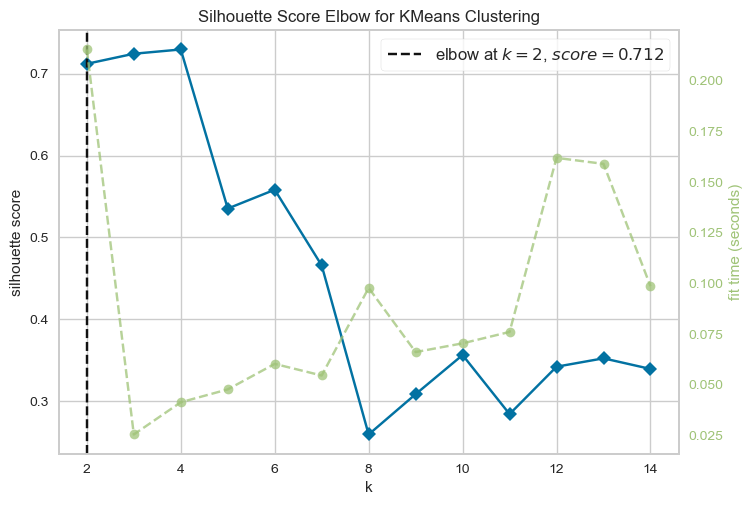

In [4]:
kmeans = sc.Clustering(df)
kmeans.sacar_clusters_kmeans()

# Dividir en 2 Grupos

,silhouette_score,davies_bouldin_index,cardinalidad
0,0.712361,0.424106,41290
1,0.712361,0.424106,10000


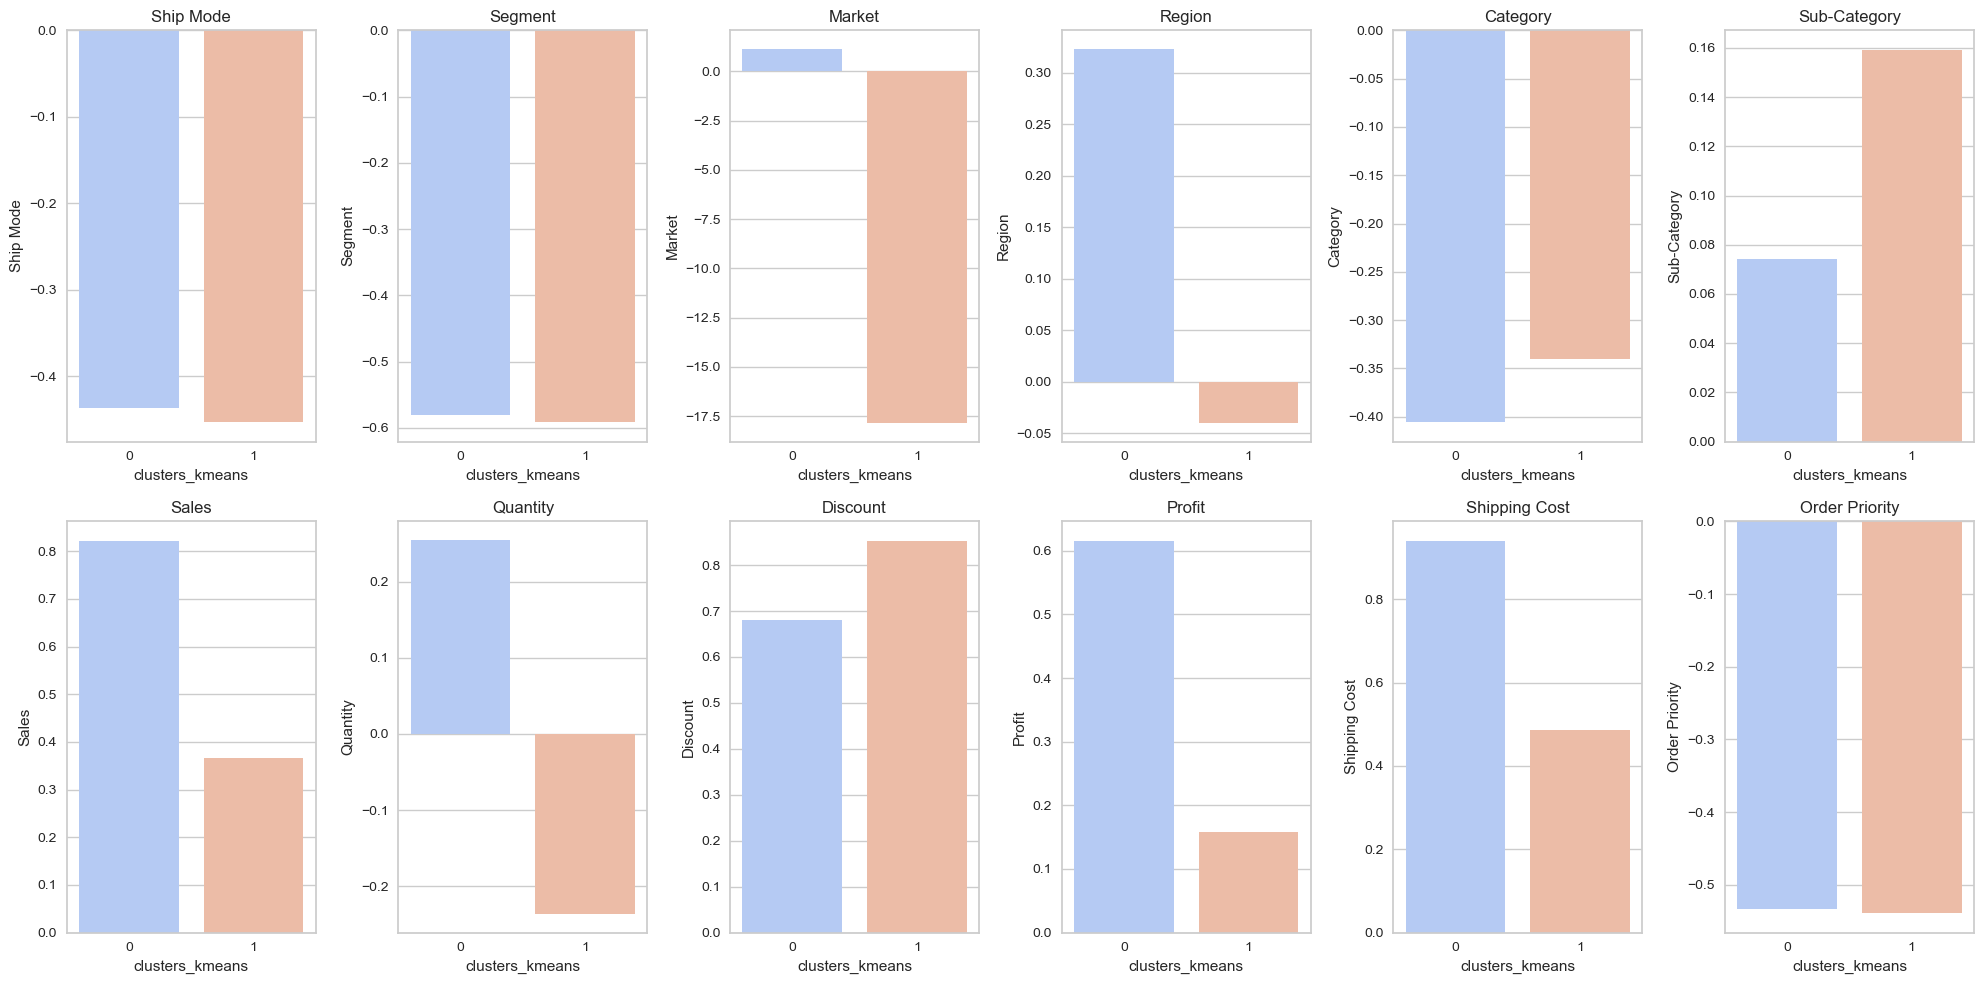

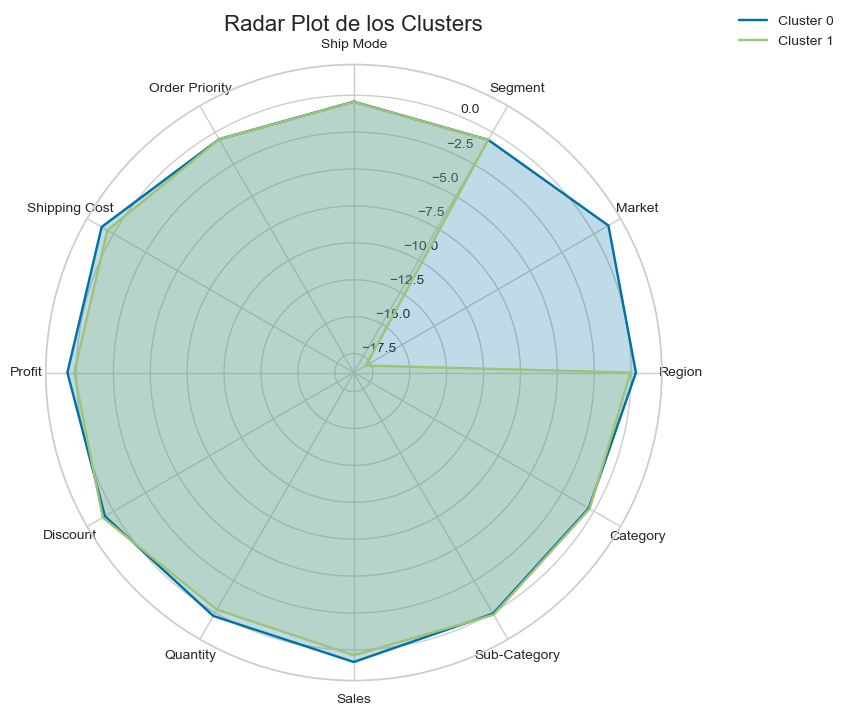

<Figure size 800x550 with 0 Axes>

In [27]:
df, labels = kmeans.modelo_kmeans(df,2,metricas=True,graficas=True)

In [28]:
kmeans_df = df.copy()
kmeans_df.sample()

,Ship Mode,Segment,Market,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,clusters_kmeans
Product ID,,,,,,,,,,,,,
OFF-AR-10000724,-1.137008,-1.0,0.0,1.839628,0.0,0.62083,0.03553,1.0,0.0,0.174409,0.255495,0.0,0


# Muy bueno
- Con esta separacion podemos unirlo al DF original para hacer nuestras métricas

In [29]:
df_og = pd.read_csv("../../../datos/Global_Superstore.csv",encoding="latin-1")

In [30]:
kmeans_df.reset_index(inplace=True)

In [31]:
kmeans_df.sample()

,Product ID,Ship Mode,Segment,Market,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,clusters_kmeans
34849,OFF-ST-10002902,0.0,-1.0,0.0,0.0,0.0,0.692433,-0.12353,-0.666667,0.0,0.330073,-0.190476,0.0,0


In [32]:
df_og.sample()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
42817,36669,CA-2012-118738,24-10-2012,30-10-2012,Standard Class,AG-10495,Andrew Gjertsen,Corporate,Houston,Texas,United States,77041.0,US,Central,OFF-PA-10003177,Office Supplies,Paper,Xerox 1999,15.552,3,0.2,5.4432,1.65,Low


In [33]:
kmeans_df = kmeans_df[["Product ID", "clusters_kmeans"]]

In [34]:
df = df_og.merge(kmeans_df,how="left")

In [35]:
df.sample()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,clusters_kmeans
9047,18060,ES-2013-5960221,28-11-2013,29-11-2013,Same Day,MS-17365,Maribeth Schnelling,Consumer,Bradford,England,United Kingdom,NaN,EU,North,FUR-CH-10002991,Furniture,Chairs,"Novimex Steel Folding Chair, Adjustable",677.76,8,0.0,94.8,158.5,Medium,0


In [36]:
df.to_pickle("../../../datos/01_clustering/04_datos_clusters.pkl")

# Dividir en 2 Dataframes
- Uno por cluster

In [37]:
df["clusters_kmeans"].value_counts()

clusters_kmeans
0    297246
1     78066
Name: count, dtype: int64

In [38]:
df["clusters_kmeans"] = df["clusters_kmeans"].astype(int)

In [39]:
c0 = df["clusters_kmeans"] == 0
c1 = df["clusters_kmeans"] == 1
grupo0 = df[c0]
grupo1 = df[c1]

In [40]:
grupo0["clusters_kmeans"].value_counts()

clusters_kmeans
0    297246
Name: count, dtype: int64

In [41]:
grupo1["clusters_kmeans"].value_counts()

clusters_kmeans
1    78066
Name: count, dtype: int64

In [42]:
grupo0.drop(columns="clusters_kmeans", inplace=True)
grupo1.drop(columns="clusters_kmeans", inplace=True)

In [ ]:
grupo0.to_pickle("../../../datos/02_regresiones/cluster_0/01_datos_cluster0.pkl")
grupo1.to_pickle("../../../datos/02_regresiones/cluster_1/02_dstos_cluster1.pkl")